# ЕГЭ 2017 Вариант 3 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 3
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

[IPv4 - Address Classes](https://www.tutorialspoint.com/ipv4/ipv4_address_classes.htm)

In [2]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [3]:
# install.packages('')

In [4]:
answer_dictionary <- hash()

In [5]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")  

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1

## 1.
Сколько единиц содержится в двоичной записи восьмеричного числа $2417_8$?

How many units are contained in the binary notation of the octal number $ 2417_8 $?

In [6]:
options(scipen = 999)
dec2bin <- function(n) {
  bv <- rep(0, 1 + floor(log(n, 2)))
  while (n >= 2) {
    pow <- floor(log(n, 2))
    bv[1 + pow] <- 1
    n <- n - 2^pow
  }
  bv[1] <- n %% 2
  paste(rev(bv), collapse = "")
}

In [7]:
# 2417 _8 = 1295 _10
2 * 8 ** 3 + 4 * 8 ** 2 + 1 * 8 ** 1 + 7 * 8 ** 0

[1] 1295

In [8]:
# 1295 _10 = 10100001111 _2
dec2bin(1295)

[1] "10100001111"

In [9]:
gsub("0","",dec2bin(1295))

[1] "111111"

In [10]:
nchar(gsub("0","",dec2bin(1295)))

[1] 6

Один разряд в восьмеричной записи соответствует трем разрядам в двоичной системе:

One digit in the octal system corresponds to three digits in the binary system:

$7 * 8^0 = 1 * 2^2 + 1 * 2^1 + 1 * 2^0$

$1 * 8^1 = 1 * 2^3$

$4 * 8^2 = 1 * 2^8$

$2 * 8^3 = 1 * 2^10$

Всего 6 ненулевых коэффициентов различных степеней основания системы 2.

There are 6 nonzero coefficients of different degrees of 2 (the binary system).

In [11]:
answer_dictionary[1] <- nchar(gsub("0","",dec2bin(2 * 8 ** 3 + 4 * 8 ** 2 + 
                                                  1 * 8 ** 1 + 7 * 8 ** 0)))

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трех аргументов X, Y, Z.

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

---

The truth table fragment of the expression F, depending on three arguments X, Y, Z, is given.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |

$1) \ X \land Y \lor Z \\ 
2) \ \neg X \land \neg Y \lor \neg Z \\ 
3) \ ( X \lor Y ) \land \neg Z \\ 
4) \ ( X \lor Y ) \to Z \\ 
5) \ \neg X \lor \neg Y \lor Z$

In [12]:
bc <- matrix(c(0,0,0, 1,1,0, 0,1,1), nrow=3, ncol=3, byrow = TRUE)
x_implies_y <- function(x,y) {!x | y}

F <- function(X, Y, Z, I) {
    if (I == 1) {return(X & Y | Z)}
    if (I == 2) {return(!X & !Y | !Z)}
    if (I == 3) {return((X | Y) & !Z)}
    if (I == 4) {return(x_implies_y((X | Y),Z))}    
    if (I == 5) {return(!X | !Y | Z)}    
} 

In [13]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(TRUE,FALSE,TRUE))){print(i)}
}

[1] 4
[1] 5


In [14]:
answer_dictionary[2] <- '45'

## 3.
На рисунке справа схема дорог Н-ского района изображена в виде графа, в таблице содержатся сведения о длинах этих дорог (в километрах).

Так как таблицу и схему рисовали независимо друг от друга, то нумерация населённых пунктов в таблице никак не связана с буквенными обозначениями на графе. 

Определите, какова длина дороги и пункта В в пункт Д. 

В ответе запишите целое число — так, как оно указано в таблице.

---

n the figure, the road scheme of the N-region is drawn in the form of a graph, the table contains information on the lengths of these roads (in kilometers).

Since the table and the graph were drawn independently of each other, the numbering of settlements in the table is not connected with the letter symbols on the graph.

Determine the length of the road from the point В to the point Д. 

In the answer, write down the integer number - as it is indicated in the table.

| &#x123CF; | П1 | П2 | П3 | П4 | П5 | П6 | П7 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **П1** | &#x123CF; | 40 | 50 | |  |  | |
| **П2** | 40 | &#x123CF; | 15 |  | 60 |  |  |
| **П3** | 50 | 15 | &#x123CF; | 25 | 30 |  |  |
| **П4** |  |  | 25 | &#x123CF; | 70 | 20 |  |
| **П5** |  | 60 | 30 | 70 | &#x123CF; | 35 | 45 |
| **П6** |  |  |  | 20 | 35 | &#x123CF; | 55 |
| **П7** |  |  |  |  | 45 | 55 | &#x123CF; |

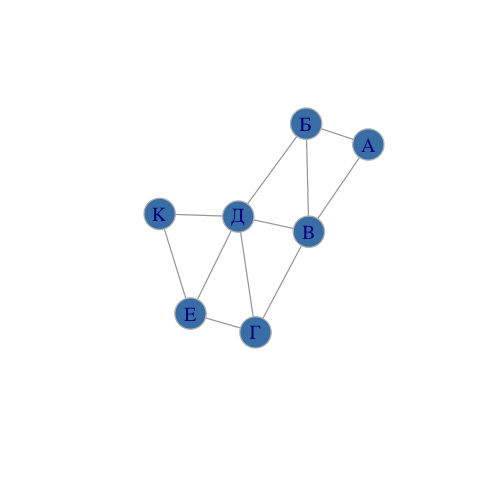

In [15]:
options(warn = -1,repr.plot.width=4,repr.plot.height=4)
edges <- c('А','Б', 'А','В', 'Б','В', 'Б','Д',
           'В','Г', 'В','Д', 'Г','Д', 'Г','Е',
           'Д','Е', 'Д','К', 'Е','К')

g <- graph(edges, directed=FALSE)
plot(g,vertex.color="steelblue", vertex.size=30, vertex.frame.color="gray")

- Только один узел имеет 5 ребер => Д == П5.
- Только один узел имеет 4 ребра => В == П3.
- А - один из узлов с 2 ребрами и А <-> В => А == П1.
- Б - один из узлов с 3 ребрами и Б <-> А, Б <-> В => Б == П2.
- Г - один из узлов с 3 ребрами и Г <-> В => Г == П4.
- Е - оставшийся узел с 3 ребрами => Е == Π6.
- К == П7.

---

- Only one node has 5 edges => Д == П5.
- Only one node has 4 edges => В == П3.
- А is one of the nodes with 2 edges and А <-> В => А == П1.
- Б is one of the nodes with 3 edges and Б <-> А, Б <-> В => Б == П2.
- Γ is one of the nodes with 3 edges and Г <-> В => Г == П4.
- Е is the remaining node with 3 edges => Е == Π6.
- К == П7.

| &#x123CF; | П1=А | П2=Б | П3=В | П4=Г | П5=Д | П6=Е | П7=К |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **П1=А** | &#x123CF; | 40 | 50 | |  |  | |
| **П2=Б** | 40 | &#x123CF; | 15 |  | 60 |  |  |
| **П3=В** | 50 | 15 | &#x123CF; | 25 | 30 |  |  |
| **П4=Г** |  |  | 25 | &#x123CF; | 70 | 20 |  |
| **П5=Д** |  | 60 | 30 | 70 | &#x123CF; | 35 | 45 |
| **П6=Е** |  |  |  | 20 | 35 | &#x123CF; | 55 |
| **П7=К** |  |  |  |  | 45 | 55 | &#x123CF; |

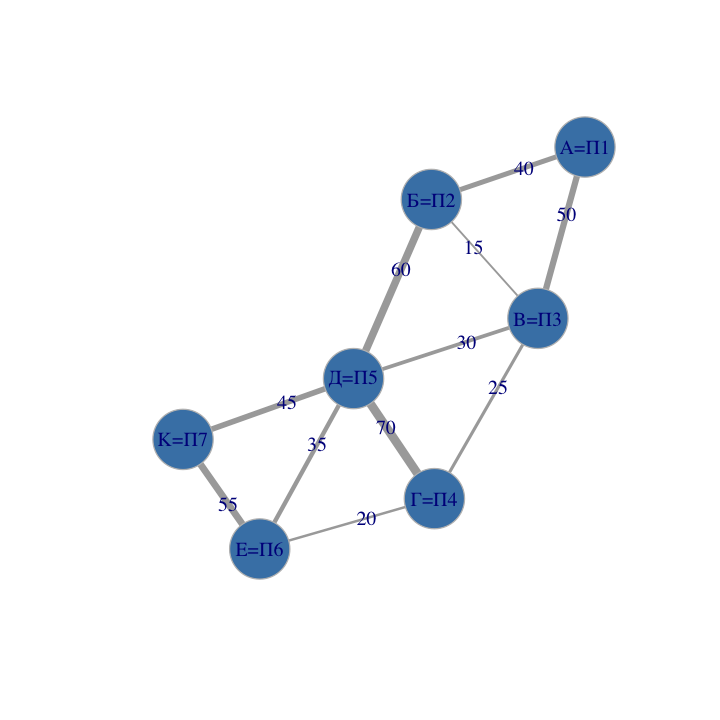

In [16]:
options(warn = -1,repr.plot.width=6,repr.plot.height=6)
edges <- c('А=П1','Б=П2', 'А=П1','В=П3', 'Б=П2','В=П3', 'Б=П2','Д=П5',
           'В=П3','Г=П4', 'В=П3','Д=П5', 'Г=П4','Д=П5', 'Г=П4','Е=П6',
           'Д=П5','Е=П6', 'Д=П5','К=П7', 'Е=П6','К=П7')
weights <- c(40,50,15,60,25,30,70,20,35,45,55)

g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)
plot(g,
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.width=E(g)$weight/10)

In [17]:
g['В=П3']['Д=П5']

Д=П5 
  30

In [18]:
answer_dictionary[3] <- toString(g['В=П3']['Д=П5'])

## 4.
Для групповых операций с файлами используются маски имён файлов. 

Маска представляет собой последовательность букв, цифр и прочих допустимых в именах файлов символов, в которой также могут встречаться следующие символы.

Символ $«?»$ (вопросительный знак) означает ровно один произвольный символ.

Символ $«*»$ (звёздочка) означает любую последовательность символов произвольной длины, в том числе $«*»$ может задавать и пустую последовательность.

В каталоге находятся шесть файлов. 

`ask.c`, `kasko.cpp`, `kraska.doc`, `nebraska.docx`, `mask.pic`, `laska.dpr`

Ниже представлено восемь масок. 

`*?sk*.???*`, `*a*k*.*c*`, `*ask?.*c*`, `*ask*.??c*`, `*a??a*.??c*`, `*.??*`,'`*ka*.?*?`, `*sk*.d*`

Сколько из них таких, которым соответствует ровно три файла из данного каталога?

---

For group operations with files, file name masks are used. 

A mask is a sequence of letters, numbers and other permissible characters in file names, in which the following characters can also occur.

The symbol $?$ (question mark) means exactly one arbitrary character.

The symbol $*$ (asterisk) stands for any sequence of characters of arbitrary length, including $*$, which can also specify an empty sequence.

There are six files in the directory. 

`ask.c`, `kasko.cpp`, `kraska.doc`, `nebraska.docx`, `mask.pic`, `laska.dpr`

Here are eight masks.

`*?sk*.???*`, `*a*k*.*c*`, `*ask?.*c*`, `*ask*.??c*`, `*a??a*.??c*`, `*.??*`,'`*ka*.?*?`, `*sk*.d*`

How many of them are those to which exactly three files from this catalog correspond?

In [19]:
file_list <- c('ask.c', 'kasko.cpp', 'kraska.doc', 
               'nebraska.docx', 'mask.pic', 'laska.dpr')
mask_list <- c('?ask*.???*', '*ask*.*c*', '*as??.*c*', '*ask*.???',
               '*a*a*.*d*', '*aska*.?*?', '?????*.???', '?s*k?.*')

df <- data.frame(file_list=file_list,
                 mask_1=grepl("^.*.sk.*\\.....*$",file_list), 
                 mask_2=grepl("^.*a.*k.*\\..*c.*$", file_list), 
                 mask_3=grepl("^.*ask.\\..*c.*$", file_list), 
                 mask_4=grepl("^.*ask.*\\...c.*$", file_list),
                 mask_5=grepl("^.*a..a.*\\...c.*$",file_list), 
                 mask_6=grepl("^.*\\....*$", file_list), 
                 mask_7=grepl("^.*ka.*\\...*.$", file_list), 
                 mask_8=grepl("^.*sk.*\\.d.*$", file_list))
df 

file_list,mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8
ask.c,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
kasko.cpp,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
kraska.doc,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
nebraska.docx,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
mask.pic,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
laska.dpr,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [20]:
c <- 0
for (i in 2:9) {
    print(mask_list[i-1]); 
    print(length(df[1:6,i][df[1:6,i]==TRUE]))
    if (length(df[1:6,i][df[1:6,i]==TRUE]) == 3) {c <- c + 1}
}

c

[1] "?ask*.???*"
[1] 5
[1] "*ask*.*c*"
[1] 5
[1] "*as??.*c*"
[1] 3
[1] "*ask*.???"
[1] 3
[1] "*a*a*.*d*"
[1] 2
[1] "*aska*.?*?"
[1] 5
[1] "?????*.???"
[1] 4
[1] "?s*k?.*"
[1] 3


[1] 3

In [21]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв А, Б, В, Г и Д, используется неравномерный двоичный код, 

позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: `А-110`, `Б-10`, `В-01`, `Г-111`. 

Каким кодовым словом должна кодироваться буква Д? 

Если таких вариантов несколько, укажите самый короткий.

---

To encode a sequence consisting of the letters А, Б, В, Г and Д, an unequal binary code is used, 

which uniquely decodes the resulting binary sequence.

Here is the code: `А-110`, `Б-10`, `В-01`, `Г-111`.

What code word should be used for encoding the letter Д? 

If there are several possible variants, specify the shortest one.

В решении использован Алгоритм Шеннона — Фано.

1) Самые короткие коды 0 и 1 не могут быть использованы - с них уже начинаются другие кодовые слова.

2) Следующая бинарная комбинация - из двух цифр. В начале кодовых слов уже встречаются 01, 10 и 11, но нет 00. 

Этим самым коротким из возможных сочетаний и можно закодировать Д.

---

The solution uses the Shannon-Fano Algorithm.

1) The shortest codes 0 and 1 cannot be used - other code words already begin with them.

2) The next binary combination is two-digital. At the beginning of the code words, there are already 01, 10 and 11, but no 00. 

This shortest possible combination can be used for encoding D.

In [22]:
answer_dictionary[5] <- '00'

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. 

В этих числах все цифры не превосходят цифру 7 (если в числе есть цифра больше 7, автомат отказывается работать). 

По этим числам строится новое шестнадцатеричное число по следующим правилам.

1. Вычисляются два шестнадцатеричных числа — сумма старших разрядов полученных чисел и сумма младших разрядов этих чисел.

2. Полученные два шестнадцатеричных числа записываются друг за другом в порядке возрастания (без разделителей).

*Пример*. Исходные числа: 52, 66. Поразрядные суммы: В, 8. Результат: 8В.

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

**A) 18 B) 2F C) 214 D) 7Е E) В7**

---

The machine receives two two-digit hexadecimal numbers. 

In these numbers, all figures do not exceed 7 (if there is a figure greater than 7 in the number, the machine refuses to work). 

For these numbers, a new hexadecimal number is constructed according to the following rules.

1. Two hexadecimal numbers are calculated - the sum of the highest digits of the obtained numbers and the sum of the lower digits of these numbers.

2. The received two hexadecimal numbers are written one after the other in ascending order (without separators).

*Example*. Original numbers: 52, 66. Bitwise sums: B, 8. Result: 8B.

Which of the suggested numbers can be the result of the operation of this machine?

List the letters in the alphabetical order corresponding to these numbers, without spaces and punctuation marks.

**A) 18 B) 2F C) 214 D) 7E E) B7**

**A) 18**

- Возможный вариант сложения и перестановки цифр:  $20_{16}$ и $61_{16}$  поразрядно суммируются и получается пара $8_{16}, 1_{16}$, затем цифры переставляются $18_{16}$.


**B) 2F**

- Цифры складываемых чисел не превышают $7_{10} (7_{16})$  => их поразрядные суммы не превышают  $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => результат сложения разрядов не может быть $15_{10} (F_{16})$.

**C) 214**

- Цифры складываемых чисел не превышают $7_{10} (7_{16})$  => их поразрядные суммы не превышают  $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => результат не может быть трехзначным в шестнадцатеричной системе.

**D) 7E**

- Возможный вариант сложения и перестановки цифр:  $73_{16}$ и $74_{16}$  поразрядно суммируются и получается пара $E_{16}, 7_{16}$, затем цифры переставляются $7E_{16}$.

**E) B7**

- Цифры расположены в порядке убывания => число не может быть результатом работы автомата.

---

**A) 18**

- The possible variant of adding and rearranging the numbers:  $20_{16}$ and $61_{16}$ are digitally summed and the pair $8_{16}, 1_{16}$ , is obtained, then the digits are rearranged $18_{16}$.

**B) 2F**

- The figures do not exceed $7_{10} (7_{16})$  => their bitwise sums do not exceed $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => the result cannot be a three-digit number in the hexadecimal system.

**C) 214**

- The figures do not exceed $7_{10} (7_{16})$  => their bitwise sums do not exceed $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => the result cannot be $15_{10} (F_{16})$.

**D) 7E**

- The possible variant of adding and rearranging the numbers:  $73_{16}$ and $74_{16}$ are digitally summed and the pair $E_{16}, 7_{16}$ , is obtained, then the digits are rearranged $7E_{16}$.

**E) B7**

- The digits are arranged in descending order => the number cannot be the result of the operation of this machine.

In [23]:
answer_dictionary[6] <- 'AD'

## 7.
В электронной таблице значение формулы `=СРЗНАЧ (С2:D5)` равно 3. 

Чему равно значение формулы `=СУММ (С5:D5)`, если значение формулы `=СРЗНАЧ (С2:D4)` равно 5?

---

In the spreadsheet, the value of the formula `=AVERAGE (C2: D5)` is 3. 

What is the value of the formula `=SUM (C5: D5)` if the value of the formula `=AVERAGE (C2: D4)` is 5?

<div style="width: 600px; height: 300px; overflow:auto;">
    <img src="it_images/2017_03_07a.png" width="600" height="300"/>
</div>
[Google Sheet](https://drive.google.com/open?id=19XfRvVOsEYj-HA7S4vQ3WeW3JOu-N-X8Hdp0oi7LW_o)

In [24]:
# (C2+C3+C4+C5+D2+D3+D4+D5)/8 = 3 <=> C2+C3+C4+C5+D2+D3+D4+D5 = 24
# (C2+C3+C4+D2+D3+D4)/6 = 5 <=> C2+C3+C4+D2+D3+D4 = 30
# C5+D5=C2+C3+C4+C5+D2+D3+D4+D5 - (C2+C3+C4+D2+D3+D4) = 24-30 = -6
answer_dictionary[7] <- toString(8 * 3 - 6 * 5)   

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
k,s = 1,8

while s < 208:
    s += 20
    k &#42;= 2
    
print(k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 

k <- 1; s <- 8

while (s < 208){
    s <- s + 20
    k <- k &#42; 2
}

print(k)
    </code></pre></td>     
  </tr>    
</table>

Determine what will be printed as a result of the next program fragment.

In [25]:
k <- 1; s <- 8
while (s < 208){
    s <- s + 20
    k <- k * 2
}
print(k)

[1] 1024


In [26]:
answer_dictionary[8] <- toString(k)

## 9.
Какой минимальный объём памяти (в Кбайт) нужно зарезервировать, 

чтобы можно было сохранить любое растровое изображение размером 64x256 пикселей 

при условии, что в изображении могут использоваться 4 различных цвета? 

В ответе запишите только целое число, единицу измерения писать не нужно.

---

What is the minimum amount of memory (in Kbytes) it needs to reserve, 

so that you can save any raster image with the size of 64x256 pixels, 

provided that it can be used 4 different colors the image? 

In the answer, write down only an integer, you do not need to write a unit of measurement.

- $\log_{2}{4} = 2$ (бита) - необходимо для кодирования одного пикселя 4-цветного изображения.
- $64 * 256 * 2 = 2^{6} * 2^{8} * 2 = 2^{15}$ (бита) - необходимо для кодирования изображения размером 64 * 256 пикселей.
- $2^{15} \ / \ 2^{3} = 2^{12}$ (байта) - необходимо для кодирования изображения размером 64 * 256 пикселей.
- $2^{12} \ / \ 2^{10} = 4$ (Кбайт) - необходимо для кодирования изображения размером 64 * 256 пикселей.

---

- $\log_{2}{4} = 2$ (bit) - necessary to encode one pixel of the 4-color image.
- $64 * 256 * 2 = 2^{6} * 2^{8} * 2 = 2^{15}$ (bit) - needed to encode an image with the size of 64 * 256 pixels.
- $2^{15} \ / \ 2^{3} = 2^{12}$ (byte) - needed to encode an image with the size of 64 * 256 pixels.
- $2^{12} \ / \ 2^{10} = 4$ (Kbytes) - needed to encode an image with the size of 64 * 256 pixels.

In [27]:
answer_dictionary[9] <- toString(log2(4) * 64 * 256 / 2 ** 3 / 2 ** 10)

## 10.
Все 4-буквенные слова, составленные из букв Б, В, Г, Д, записаны в алфавитном порядке. Вот начало списка:

1. `ББББ`

2. `БББВ`

3. `БББГ`

4. `БББД`

5. `ББВБ`

Запишите слово, стоящее на 244-м месте от начала списка.

---

All 4-letter words, composed of the letters Б, В, Г, Д, are written in alphabetical order. Here is the top of the list:

1. `ББББ`

2. `БББВ`

3. `БББГ`

4. `БББД`

5. `ББВБ`

Write down the word that stands on the 244th place from the beginning of the list.

1) Кодирование 4 символами Б, В, Г, Д аналогично переводу в систему счисления с основанием 4, где используются цифры 0,1,2,3.

1. `ББББ: 0000`  
2. `БББВ: 0001`
3. `БББГ: 0002`
4. `БББД: 0003`
5. `ББВБ: 0010`

2) На 244 месте списка целых неотрицательных чисел в десятичной системе счисления стоит 243. 

При переводе в четверичную систему получается $243_{10} = 3 * 4^3 + 3 * 4^2 + 3 * 4^0 = 3303_4$.

3) Заменим на буквенные обозначения 3 → Д, 0 → Б: `ДДБД`.

---

1) Coding with 4 symbols Б, В, Г, Д is analogous to the translation into the number system with base 4, where the digits 0,1,2,3 are used.

1. `ББББ: 0000`
2. `БББВ: 0001`
3. `БББГ: 0002`
4. `БББД: 0003`
5. `ББВБ: 0010`

2) The 244th place of the list of non-negative integers in the decimal system is filled by 243.

When translating into a quaternary system, $243_{10} = 3 * 4^3 + 3 * 4^2 + 3 * 4^0 = 3303_4$ is obtained.

3) Then we replace digits by letters 3 → Д, 0 → Б: `ДДБД`.

In [28]:
four_digit_string <- paste(toString(as.integer(243/4**3)),toString(as.integer(243%%4**3/4**2)),sep='')
four_digit_string <- paste(four_digit_string,toString(as.integer(243%%4**3%%4**2/4)),sep='')
four_digit_string <- paste(four_digit_string,toString(as.integer(243%%4)),sep='')
paste('243 -> ',four_digit_string,sep='')              

[1] "243 -> 3303"

In [29]:
four_digit_string <- gsub('3','Д',four_digit_string)
four_digit_string <- gsub('0','Б',four_digit_string)

In [30]:
answer_dictionary[10] <- four_digit_string

## 11.
Алгоритм вычисления значения функции `F(n)`, где `n` — натуральное число, задан следующими соотношениями:

`F(n) = F(n - 1) + n - 2, при n > 1`

`F(1) - 2`

Чему равно значение функции `F(7)`?

(В ответе запишите только натуральное число.)

---

The algorithm for calculating the value of the function `F(n)`, where `n` is a natural number, is given by the following relations:

`F(n) = F(n - 1) + n - 2, for n > 1`

`F(1) = 2`

What is the value of the function `F(7)`?

(In the answer write down only the natural number.)

In [31]:
F <- function(n) {
    if (n == 1) {
        return(2)
    }
    if (n > 1) {
        return(F(n - 1) + n - 2)
    }
}

F(7)

[1] 17

In [32]:
answer_dictionary[11] <- toString(F(7))

## 12.
На месте преступления были обнаружены четыре обрывка бумаги. Следствие установило, что на них записаны фрагменты одного IP-адреса.

Криминалисты обозначили эти фрагменты буквами A, B, C и D. 

Восстановите IP-адрес.

В ответе укажите последовательность букв, обозначающих фрагменты, в порядке, соответствующем IP-адресу.

| `.25` | `6.8` | `202` | `4.24` |
|:-:|:-:|:-:|:-:|
| A | B | C | D |

At the crime scene, four pieces of paper were found. The investigation found that they recorded fragments of one IP-address. 

Forensics designated these fragments with letters A, B, C and D. 

Recover the IP address.

In the answer, specify the sequence of letters indicating the fragments, in the order corresponding to the IP address.

IP-адрес (IPv4) является 32-битовым (4-байтовым) числом, 

запись которого состоит из последовательности 4 десятичных чисел 

с максимальным значением 255. 

Например: $192.168.0.3$. 

Адрес в задаче содержит 13 символов: 10 цифр и три точки. 

Один из фрагментов ($C$) начинается с трех цифр, но нет фрагментов, заканчивающихся точкой, которых можно было бы присоединить слева.

Значит, $C$ и есть первая часть адреса.

Дальше, согласно структуре записи, должна быть точка. Только один вариант начинается с этого символа - $A$. 

$CA == 202.25$

$B$ не может быть следующим: при его присоединении получается 256 > 255. Значит, третий фрагмент - $D$, а $B$ - четвертый.

$CADB == 202.254.246.8$

---

The IP address (IPv4) is a 32-bit (4-byte) number 

which record consists of a sequence of 4 decimal numbers 

with the maximum value of 255. 

For example: $192.168.0.3$.

The address in the task contains 13 characters: 10 digits and 3 dots. 

One of the fragments ($C$) begins with three digits, but there are no fragments ending with a point that could be added to the left. 

Hence, $C$ is the first part of the address.

Further, according to the structure of the record, there must be a point. Only one fragment starts with this symbol - $A$. 

$CA == 202.25$

$B$ cannot be the next part: when it is attached, we get 256 > 255. This means that the third fragment is $D$, and $B$ is the fourth.

$CADB == 202.254.246.8$

In [33]:
answer_dictionary[12] <- 'CADB'

## 13.
</div>
Для передачи секретного сообщения используется код, состоящий из десятичных цифр. 

При этом все цифры кодируются одним и тем же (минимально возможным) количеством бит. 

Определите информационный объём сообщения (в байтах) длиной в 200 символов.

---

To transmit a secret message, a code consisting of decimal digits is used. 

In this case, all the digits are coded with the same (minimum possible) number of bits. 

Determine the information volume of the message (in bytes) of 200 characters in length.

1) $3 < \log_{2}{10} < 4 \implies 4$ (бит) - необходимо для кодирования номера одного из 10 символов.

Количество возможных вариантов кодировки ($2^4$) не должно быть меньше количества имеющейся информации ($10$ символов), 

округление в данном случае - всегда в большую сторону.

2) $4 * 200 = 800$ (бит) - необходимо для кодирования номеров 200 символов.

3) $800 / 8 = 100$ (байт) - необходимо для кодирования номеров 200 символов.

---

1) $3 < \log_{2}{10} < 4 \implies 4$ (bit) - necessary to encode the number of one of 10 characters.

The number of possible encoding options ($2^4$) should not be less than the amount of information available ($10$ characters), 

rounding, in this case, is always on the larger side.

2) $4 * 200 = 800$  (bits) - necessary for encoding the numbers of 200 characters.

3) $800 / 8 = 100$  (bytes) - necessary for encoding the numbers of 200 characters.

In [34]:
bits_for_one_symbol_from_10 <- ceiling(log2(10))
bits_for_200_symbol_from_10 <- 200 * bits_for_one_symbol_from_10
bytes_for_200_symbol_from_10 <- bits_for_200_symbol_from_10 / 2 ** 3               

In [35]:
answer_dictionary[13] <- toString(bytes_for_200_symbol_from_10)

## 14.
Исполнитель $Редактор$ получает на вход строку цифр и преобразовывает её. 

$Редактор$ может выполнять две команды, в обеих командах `v` и `w` обозначают цепочки цифр.

$А)$ `заменить (v, w)`.

Эта команда заменяет в строке первое слева вхождение цепочки `v` на цепочку` w`. 

Например, выполнение команды `заменить (222, 34)` преобразует строку `77222277` в строку `7734277`. 

Если в строке нет вхождений цепочки `v`, то выполнение команды `заменить (v, w)` не меняет эту строку.

$Б)$ `нашлось (v)`.

Эта команда проверяет, встречается ли цепочка `v` в строке исполнителя $Редактор$. 

Если она встречается, то команда возвращает логическое значение `«истина»`, в противном случае возвращает значение `«ложь»`. 

Строка при этом не изменяется исполнителем.

Цикл 

`ПОКА` $<условие>$

- $последовательность \ команд$
    
`КОНЕЦ ПОКА`

выполняется, пока условие истинно.

В конструкции 

`ЕСЛИ` $<условие>$

- `ТО` $команда \ 1$

- `ИНАЧЕ` $команда \ 2$
    
`КОНЕЦ ЕСЛИ`

выполняется `команда 1` (если условие `"истинно"`) или `команда 2` (если условие `"ложно"`).

Какая строка получится в результате применения приведённой ниже программы к строке, состоящей из 80 идущих подряд цифр 7? 

В ответе запишите полученную строку.

---

The performer $Editor$ receives a string of numbers and converts it. 

It can execute two commands, in both commands, `v` and `w` denote a chain of numbers.

$A)$ `replace (v, w)`.

This command replaces the first from the left with the occurrence of the chain `v` on the chain `w`. 

For example, executing the command to `replace (222, 34)` converts line `77222277` to line `7734277`. 

If there are no occurrences of a chain `v` in the string, then the execution of the command to `replace (v, w)` does not change this line.

$B)$ `found (v)`.

This command checks if the string `v` is found in the line. 

If it occurs, the command returns a logical value of `"true"`, otherwise it returns `"false"`. 

The string is not changed by the performer in this case.

The cycle

`WHILE` $<condition>$

- $command \ sequence$

`END while`

is executed until the condition is true.


In the construction

`IF` $<condition>$

- `THEN` $command \ 1$

- `ELSE` $command \ 2$

`END IF`

the command 1 is executed (if the condition is `"true"`) or command 2 is executed (if the condition is `"false"`).

Which line will result from applying for the program below to the line consisting of 80 consecutive digits 7? 

In the answer write down the received line.

`НАЧАЛО`

`ПОКА` $<нашлось \; (777)>$ `ИЛИ` $<нашлось \; (888)>$

  - `ЕСЛИ` $<нашлось \; (777)>$
    
      - `ТО` $<заменить \; (777, 8)>$
        
      - `ИНАЧЕ` $<заменить \; (888, 7)>$
     
  - `КОНЕЦ ЕСЛИ`
    
`КОНЕЦ ПОКА`

`КОНЕЦ`

---

`START`

`WHILE` $<found \; (777)>$ `OR` $<found \; (888)>$

- `IF` $<found \; (777)>$

  - `THEN` $<replace \; (777, 8)>$
  
  - `ELSE` $<replace \; (888, 7)>$
  
- `END IF`

`END WHILE`

`END`

In [36]:
string <- paste(replicate(80, "7"), collapse = "")
string

[1] "77777777777777777777777777777777777777777777777777777777777777777777777777777777"

In [37]:
grepl("777",string); grepl("888",string)

[1] TRUE

[1] FALSE

In [38]:
string_function <- function(w) {
    while (grepl("777",w) | grepl("888",w)) {
        
        if (grepl("777",w)) { 
            w <- sub('777','8',w)
            print(w)
        } else {
            w <- sub('888','7',w)
            print(w)
        }
    }
    
    return(w)
}

In [39]:
result <- string_function(string)

[1] "877777777777777777777777777777777777777777777777777777777777777777777777777777"
[1] "8877777777777777777777777777777777777777777777777777777777777777777777777777"
[1] "88877777777777777777777777777777777777777777777777777777777777777777777777"
[1] "888877777777777777777777777777777777777777777777777777777777777777777777"
[1] "8888877777777777777777777777777777777777777777777777777777777777777777"
[1] "88888877777777777777777777777777777777777777777777777777777777777777"
[1] "888888877777777777777777777777777777777777777777777777777777777777"
[1] "8888888877777777777777777777777777777777777777777777777777777777"
[1] "88888888877777777777777777777777777777777777777777777777777777"
[1] "888888888877777777777777777777777777777777777777777777777777"
[1] "8888888888877777777777777777777777777777777777777777777777"
[1] "88888888888877777777777777777777777777777777777777777777"
[1] "888888888888877777777777777777777777777777777777777777"
[1] "8888888888888877777777777777777777777777777777

In [40]:
answer_dictionary[14] <- result

## 15.

На рисунке — схема дорог, связывающих города А, Б, В, Г, Д, Е, Ж, И, К. 

По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. 

Сколько существует различных путей из города А в город К?

---

In the figure - the scheme of roads connecting the cities А, Б, В, Г, Д, Е, Ж, И, К. 

For each road, it is possible to move only in one direction, indicated by the arrow. 

How many different paths exist from the city А to the city К?

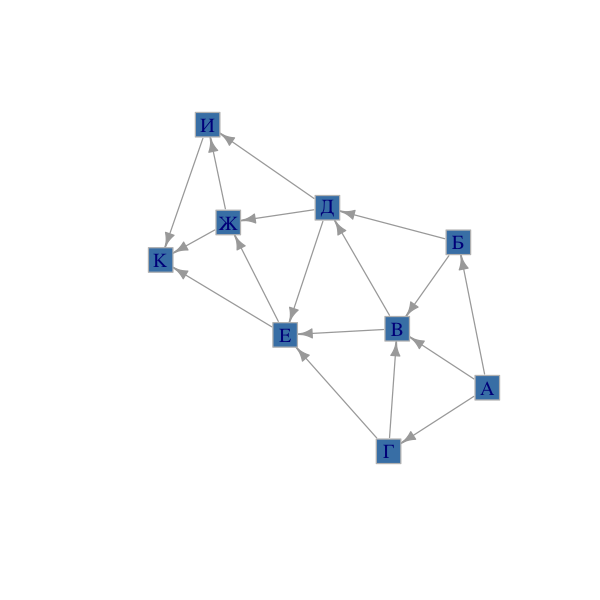

In [41]:
options(warn = -1,repr.plot.width=5,repr.plot.height=5)
edges <- c('А','Б', 'А','В', 'А','Г', 'Б','В', 'Б','Д',
           'В','Д', 'В','Е', 'Г','В', 'Г','Е',
           'Д','Е', 'Д','И', 'Д','Ж', 'Е','Ж', 'Е','К',
           'Ж','И', 'Ж','К', 'И','К')
g2 <- graph(edges)
plot(g2,
     vertex.color="steelblue",vertex.size=15,
     vertex.frame.color="gray",vertex.shape='square')

In [42]:
paths <- all_simple_paths(g2,'А','К')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "А" "Б" "В" "Д" "Е" "Ж" "И" "К"

[[2]]
[1] "А" "Б" "В" "Д" "Е" "Ж" "К"

[[3]]
[1] "А" "Б" "В" "Д" "Е" "К"

[[4]]
[1] "А" "Б" "В" "Д" "И" "К"

[[5]]
[1] "А" "Б" "В" "Д" "Ж" "И" "К"

[[6]]
[1] "А" "Б" "В" "Д" "Ж" "К"

[[7]]
[1] "А" "Б" "В" "Е" "Ж" "И" "К"

[[8]]
[1] "А" "Б" "В" "Е" "Ж" "К"

[[9]]
[1] "А" "Б" "В" "Е" "К"

[[10]]
[1] "А" "Б" "Д" "Е" "Ж" "И" "К"

[[11]]
[1] "А" "Б" "Д" "Е" "Ж" "К"

[[12]]
[1] "А" "Б" "Д" "Е" "К"

[[13]]
[1] "А" "Б" "Д" "И" "К"

[[14]]
[1] "А" "Б" "Д" "Ж" "И" "К"

[[15]]
[1] "А" "Б" "Д" "Ж" "К"

[[16]]
[1] "А" "В" "Д" "Е" "Ж" "И" "К"

[[17]]
[1] "А" "В" "Д" "Е" "Ж" "К"

[[18]]
[1] "А" "В" "Д" "Е" "К"

[[19]]
[1] "А" "В" "Д" "И" "К"

[[20]]
[1] "А" "В" "Д" "Ж" "И" "К"

[[21]]
[1] "А" "В" "Д" "Ж" "К"

[[22]]
[1] "А" "В" "Е" "Ж" "И" "К"

[[23]]
[1] "А" "В" "Е" "Ж" "К"

[[24]]
[1] "А" "В" "Е" "К"

[[25]]
[1] "А" "Г" "В" "Д" "Е" "Ж" "И" "К"

[[26]]
[1] "А" "Г" "В" "Д" "Е" "Ж" "К"

[[27]]
[1] "А" "Г" "В" "Д" "Е" "К"

[[28]]
[1] "А" "Г" "В" "Д" "И" "К"

[[29]]
[1] "А" "Г" "В" "Д" "Ж" "И" "К"

[[30]]
[1] "А" "Г" "В" "Д" "Ж" "К"

[[31]]
[1] "А" "Г" "В" "Е" "Ж" "И" "К"

[[32]]
[1] "А" "Г" "В" "Е" "Ж" "К"

[[33]]
[1] "А" "Г" "В" "Е" "К"

[[34]]
[1] "А" "Г" "Е" "Ж" "И" "К"

[[35]]
[1] "А" "Г" "Е" "Ж" "К"

[[36]]
[1] "А" "Г" "Е" "К"

In [43]:
answer_dictionary[15] <- toString(length(paths))

## 16.
Укажите наименьшее основание системы счисления, в которой запись десятичного числа 70 имеет ровно 3 значащих разряда.

---

Specify the smallest base of the number system, in which the decimal number 70 has exactly 3 significant digits.

1)

Запишем наименьшее четырехзначное число в системе счисления с основнием х.

Let us write the smallest four-digit number in the number system with base x.

$1000_x == 1 * x^3 + 0 * x^2 + 0 * x^1 + 0 * x^0 = x^3$

Запись десятичного числа 70 будет иметь не больше 3 значащих разрядов в системе с основанием х, 

если наименьшее четырехзначное число в ней > 70.

Recording of decimal number 70 will have no more than 3 significant digits in the system with base x 

if the smallest four-digit number in it > 70.

$x^3 > 70 \ (x \in \mathbb{N}) \iff x \geq 5 \ (x \in \mathbb{N})$

2)

Запишем наибольшее двузначное число в системе счисления с основнием х.

Let us write the largest two-digit number in the number system with the base x.

$(x-1)(x-1)_x == (x - 1) * x^1 + (x - 1) * x^0 = x^2 - 1$

Запись десятичного числа 70 будет иметь не меньше 3 значащих разрядов в системе с основанием х, 

если наибольшее двузначное число в ней < 70.

The recording of decimal number 70 will have at least 3 significant digits in the system with base x 

if the largest two-digit number in it < 70.

$x^2 - 1 < 70 \ (x \in \mathbb{N}) \iff x \leq 8 \ (x \in \mathbb{N})$

3)

Минимальное натуральное число в промежутке $5 \leq x \leq 8$ равно 5.

The minimal natural number in the interval $5 \leq x \leq 8$ is equal to 5.

In [44]:
answer_dictionary[16] <- toString(ceiling(70 ** (1 /3)))

Второе условие не обязательно проверять: чем больше основание системы счисления, тем короче в ней запись чисел.

The second condition is not necessary to check: a larger base of a numeric system means shorter records of numbers.

## 17.
В языке запросов к поисковому серверу для обозначения 
- логической операции $«ИЛИ»$ используется символ $\large{\mid}$, 
- а для логической операции $«И»$ — $\&$. 

В таблице приведено количество страниц, которое находит поисковая система по каждому запросу.

- `Запрос` -> `Количество найденных страниц`

- `Колеса` -> `8700`

- `Шины` -> `4300`

- `Колеса & Шины` -> `1400`

Какое количество страниц будет найдено по запросу:  `Колеса | Шины`?

Считается, что все запросы выполнялись практически одновременно, 

так что набор страниц, содержащих все искомые слова, не изменялся за время выполнения запросов.

---

In the query language to the search server, 
- the symbol $\large{\mid}$ is used to indicate the logical operation $OR$, 
- and for the logical operation $AND$ - $\&$. 

The table shows the number of pages that the search engine finds for each query.

- `Query` -> `Number of pages found`

- `Wheels` -> `8700`

- `Tires` -> `4300`

- `Wheels & Tires` -> `1400`

How many pages will be found on the query:  `Wheels | Tires`?

It is assumed that all queries were executed almost simultaneously 

so that the set of pages containing all the searched words did not change during the execution of queries.

In [45]:
wheels <- 8700
tires <- 4300
wheels_and_tires <- 1400

# колеса_или_шины = колеса + шины - колеса_и_шины
wheels_or_tires <- wheels + tires - wheels_and_tires

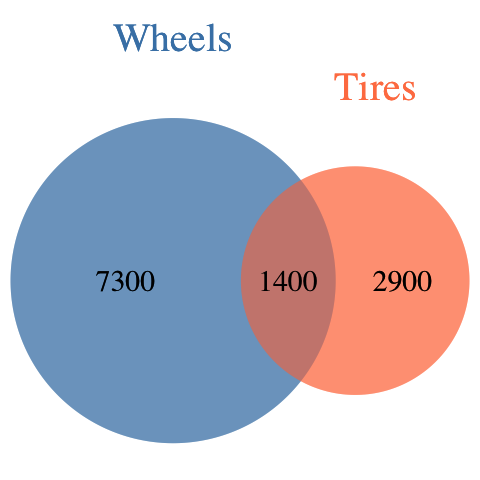

In [46]:
options(repr.plot.width=4,repr.plot.height=4)
venn.plot <- draw.pairwise.venn(
    area1 = wheels, area2 = tires, cross.area = wheels_and_tires,
    category = c("Wheels", "Tires"),
    fill = c("steelblue", "coral"),
    lty = "blank",
    cex = 1.5, cat.cex = 2, 
    cat.dist = c(0.1, 0.1), cat.pos = c(0, 6),
    cat.col = c("steelblue", "coral")
);
grid.draw(venn.plot);

In [47]:
answer_dictionary[17] <- toString(wheels_or_tires)

## 18.
Какое количество натуральных чисел удовлетворяет логическому условию: 

How many natural numbers satisfy the logical condition: 

$\neg (X^2 \geq 9) \lor \neg ((X < 7) \lor (X \geq 10))$?

$\neg (X^2 \geq 9) \lor \neg ((X < 7) \lor (X \geq 10)) \ (X \in \mathbb{N}) \iff$

$\iff \neg ((X \leq -3) \lor (X \geq 3)) \lor \neg ((X < 7) \lor (X \geq 10)) \ (X \in \mathbb{N}) \iff$

$ \iff (-3 < X < 3) \lor (7 \leq X < 10) \ (X \in \mathbb{N}) \iff$

$\iff X \in \{1, 2, 7, 8, 9\} \ (X \in \mathbb{N})$

In [48]:
answer_dictionary[18] <- toString(length(c(1, 2, 7, 8, 9)))

## 19.
В программе используется целочисленный массив `А` с индексами от `0` до `9`. 

Значения элементов массива равны $4; 5; 4; 7; 10; 8; 9; 11; 7; 8$ соответственно, т.е. $А[0] = 4; \; А[1] = 5$ и т.д.

Определите значение переменной `k` после выполнения следующего фрагмента программы, 

записанной ниже на разных языках программирования.

---

The program uses an integer array `A` with indices from` 0` to `9`.

Values of array elements are equal to $4; 5; 4; 7; 10; 8; 9; 11; 7; 8$ respectively, i.e. $А[0] = 4; \; А[1] = 5$, etc.

Determine the value of the variable `k` after the execution of the next program fragment, 

recorded below in different programming languages.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
A = [4,5,4,7,10,8,9,11,7,8]
k = 0

for i in range(9): 
    if (A[i] < A[i+1]) and (i % 2 == 0):
        k += 1
        t = A[i]
        A[i] = A[i+1]
        A[i+1] = t 
      
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
A <- c(4,5,4,7,10,8,9,11,7,8)
k <- 0

for (i in 0:8) {
    if ((A[i+1] < A[i+2]) & (i %% 2 == 0)) {
        k <- k + 1
        t <- A[i+1]
        A[i+1] <- A[i+2]
        A[i+2] <- t
    }
}
    </code></pre></td>     
  </tr>    
</table>

In [49]:
A <- c(4,5,4,7,10,8,9,11,7,8)
k <- 0

for (i in 0:8) {
    if ((A[i+1] < A[i+2]) & (i %% 2 == 0)) {
        k <- k + 1
        t <- A[i+1]
        A[i+1] <- A[i+2]
        A[i+2] <- t
    }
}

k

[1] 4

In [50]:
answer_dictionary[19] <- toString(k)

## 20.
Ниже на нескольких языках записан алгоритм. 

Получив на вход число х, этот алгоритм печатает два числа: L и М. 

Укажите наименьшее из таких чисел х, при вводе которых алгоритм печатает сначала 8, а потом 13.

---

Below, in several languages, an algorithm is written. 

Having received the number x on the input, this algorithm prints two numbers: L and M. 

Indicate the smallest of such numbers x, at using as an input of which the algorithm prints at first 8, and then 13.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
L, M = 0, 0
x = int(input())
  
while x > 0:
    M = M + x % 10
    if x % 10 > L:
        L = x % 10
        
    x = int(x / 10)
    
print(L, M)
      
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
L <- 0; M <- 0
x <- as.integer(readline())
  
while (x > 0) {
    M <- M + x %% 10
    
    if (x %% 10 > L) {
        L <- x %% 10
    }
    
    x <- as.integer(x / 10)
}

print(paste(L, M, sep=" "))   

    </code></pre></td>     
  </tr>    
</table>

In [52]:
L <- 0; M <- 0
x <- as.integer(readline())
  
while (x > 0) {
    M <- M + x %% 10
    
    if (x %% 10 > L) {
        L <- x %% 10
    }
    
    x <- as.integer(x / 10)
}

print(paste(L, M, sep=" "))  

58
[1] "8 13"


Программа, используя остаток от деления на 10 и целочисленное деление на 10, 

определяет наибольшую цифру (L) в числе x и сумму всех цифр (M). 

(L, M) = (8,13) для всех x из множества {58, 85, 148, 184, ...} 

Число 58 будет наименьшим в этом ряду.

---

The program, using the remainder of dividing by 10 and the integer division by 10, 

determines the largest digit (L) in the number x and the sum of all the digits (M).

(L, M) = (8,13) for all x from the set {58, 85, 148, 184, ...}

The number 58 will be the smallest in this series.

In [51]:
# расширенная версия программы
MIN <- 1000

for (x in 50:90) {  
    L <- 0; M <- 0
    t <- x
    
    while (x > 0) {
        M <- M + x %% 10
        
        if (x %% 10 > L) {
            L <- x %% 10
        }
        
        if (L == 8 & M == 13 & MIN > t) {
            MIN <- t
        }
            
        x <- as.integer(x / 10)
    }
    
    print(sprintf("%i %i %i", t, L, M))
}

[1] "50 5 5"
[1] "51 5 6"
[1] "52 5 7"
[1] "53 5 8"
[1] "54 5 9"
[1] "55 5 10"
[1] "56 6 11"
[1] "57 7 12"
[1] "58 8 13"
[1] "59 9 14"
[1] "60 6 6"
[1] "61 6 7"
[1] "62 6 8"
[1] "63 6 9"
[1] "64 6 10"
[1] "65 6 11"
[1] "66 6 12"
[1] "67 7 13"
[1] "68 8 14"
[1] "69 9 15"
[1] "70 7 7"
[1] "71 7 8"
[1] "72 7 9"
[1] "73 7 10"
[1] "74 7 11"
[1] "75 7 12"
[1] "76 7 13"
[1] "77 7 14"
[1] "78 8 15"
[1] "79 9 16"
[1] "80 8 8"
[1] "81 8 9"
[1] "82 8 10"
[1] "83 8 11"
[1] "84 8 12"
[1] "85 8 13"
[1] "86 8 14"
[1] "87 8 15"
[1] "88 8 16"
[1] "89 9 17"
[1] "90 9 9"


In [52]:
answer_dictionary[20] <- toString(MIN)

## 21.
Определите, при каком наибольшем значении $b$ в результате выполнения следующего алгоритма будет напечатано число 50 

(для Вашего удобства алгоритм представлен на нескольких языках).

---

Determine with what the largest value of $b$ as a result of the following algorithm will be printed for the number 50 

(for your convenience, the algorithm is presented in several languages).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
def F(x):
    if x % 3 == 0: 
        return 0
    else: 
        return 1
    
a, k = 20, 0

b = int(input())

for t in range(a, b+1):
    k += F(t)

print(k)      
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
F <- function(x) {
    if (x %% 3 == 0) {
        return(0)
    } else {
        return(1)
    }
}
        
a <- 20; k <- 0

b <- as.integer(readline())

for (t in a:b) {
    k <- k + F(t)
}

print(k)  
    </code></pre></td>     
  </tr>    
</table>

In [55]:
F <- function(x) {
    if (x %% 3 == 0) {
        return(0)
    } else {
        return(1)
    }
}
        
a <- 20; k <- 0

b <- as.integer(readline())

for (t in a:b) {
    k <- k + F(t)
}

print(k)

94
[1] 50


In [53]:
# расширенная версия программы
F <- function(x) {
    if (x %% 3 == 0) {
        return(0)
    } else {
        return(1)
    }
}

A <- matrix(nrow=2, ncol=100-19) 

for (b in 20:100) {
    a <- 20; k <- 0
    
    for (t in a:b) {
        k <- k + F(t)
    }
        
    A[1,b-19] <- b
    A[2,b-19] <- k
}

print("Pairs [b,k]:")
print(A)

[1] "Pairs [b,k]:"
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   20   21   22   23   24   25   26   27   28    29    30    31    32    33
[2,]    1    1    2    3    3    4    5    5    6     7     7     8     9     9
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26]
[1,]    34    35    36    37    38    39    40    41    42    43    44    45
[2,]    10    11    11    12    13    13    14    15    15    16    17    17
     [,27] [,28] [,29] [,30] [,31] [,32] [,33] [,34] [,35] [,36] [,37] [,38]
[1,]    46    47    48    49    50    51    52    53    54    55    56    57
[2,]    18    19    19    20    21    21    22    23    23    24    25    25
     [,39] [,40] [,41] [,42] [,43] [,44] [,45] [,46] [,47] [,48] [,49] [,50]
[1,]    58    59    60    61    62    63    64    65    66    67    68    69
[2,]    26    27    27    28    29    29    30    31    31    32    33    33
     [,51] [,52] [,53] [,54] [,55] [,56] [,57] [

Алгоритм вычисляет количество натуральных чисел x, не кратных 3, 

находящихся в интервале $20 \leq  x \leq b$ для разных значений параметра $b$. 

При анализе натурального ряда на два не кратных 3 числа приходится 1 кратное, т.е. 

для $b=50$ программе нужно последовательно оценить 75 натуральных чисел, 

причем подсчет начинается с 20 и первые 19 чисел не учитываются: $19 + 75 = 94$.

---

The algorithm calculates the number of natural numbers x that are not multiples of 3 

in the interval $20 \leq x \leq b$ for different values of the parameter $b$. 

When analyzing the natural numbers for every two x that are not multiples of 3 we have one x that are multiples of 3 so 

for $b = 50$ the program needs to consistently evaluate 75 natural numbers, 

with the count starting at 20 and the first 19 numbers are being ignored: $19 + 75 = 94$.

In [54]:
answer_dictionary[21] <- toString(94)

## 22.
У исполнителя `Удвоитель` две команды, которым присвоены номера:

1. `прибавь 3`,

2. `умножь на 2`.

Первая из них увеличивает число на экране на 3, вторая удваивает его. 

Программа для `Удвоителя` — это последовательность команд.

Сколько есть программ, которые число $1$ преобразуют в число $25$?

---

The performer `Doubler` can execute two commands, which are assigned numbers:

1. `add 3`,

2. `multiply by 2`.

The first of them increases the number on the screen by 3, the second doubles it. 

The program for `Doubler` is a sequence of commands.

How many programs are there that the number $1$ is converted to the number $25$?

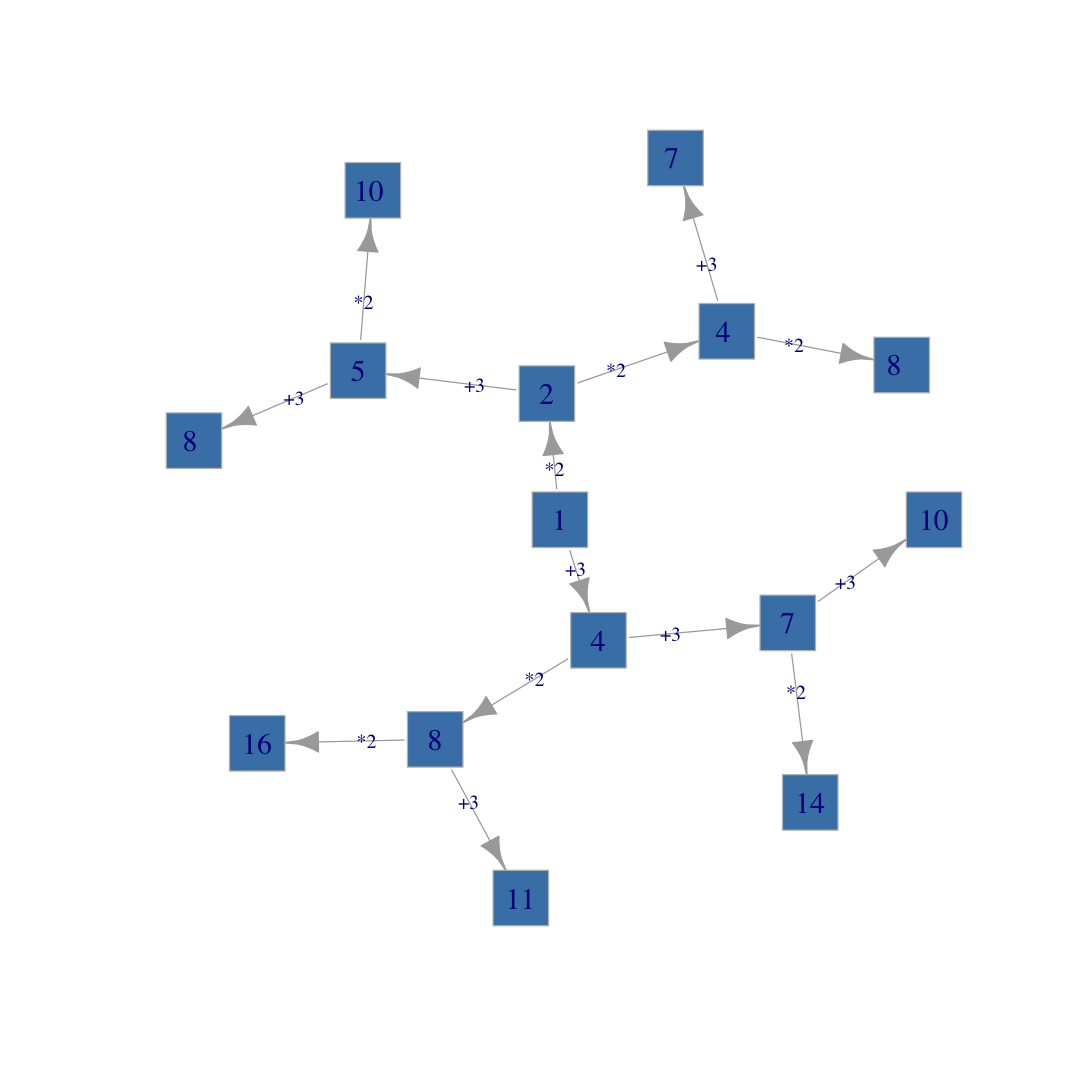

In [55]:
options(repr.plot.width=9,repr.plot.height=9)
edges1 <- c('1','4', '1','2', '4','7', '4','8', '2','5', '2','4 ',
            '7','10', '7','14', '8','11', '8','16', 
            '5','8 ', '5','10 ', '4 ','7 ', '4 ','8  ')

elabels <- c('+3','*2', '+3','*2', '+3','*2', '+3','*2',
             '+3','*2', '+3','*2', '+3','*2', '+3','*2')

g1 <- graph(edges1)

plot(g1,layout=layout_as_tree(g1,circular=TRUE),
     edge.label=elabels,vertex.color="steelblue",
     vertex.size=15,vertex.label.cex=1.5,
     vertex.frame.color="gray",vertex.shape='square')

| Последовательность чисел / A sequence of numbers | Программа / Program |
|:--|:--|
| 1,2,4,7,10,13,16,19,22,25 | `221111111` |
| 1,4,7,10,13,16,19,22,25 | `11111111` |
| 1,2,5,10,13,16,19,22,25 | `21211111` |
| 1,2,5,8,16,19,22,25 | `2112111` |
| 1,2,4,8,16,19,22,25 | `2222111` |
| 1,4,8,16,19,22,25 | `122111` |
| 1,2,5,8,11,22,25 | `211121` |
| 1,2,4,8,11,22,25 | `222121` |
| 1,4,8,11,22,25 | `12121` |

Последовательность команд максимальной длины, при которой из числа 1 можно получить число 25 состоит из 9 шагов:

- числа 1,2,4,7,10,13,16,19,22,25;
- команды 2,2,1,1,1,1,1,1,1.

Применив все возможные варианты программ из 9 шагов, возможно подсчитать, 

сколько последовательностей содержит 25, если начать с 1.

---

A sequence of commands with a maximum length for the moving from the number 1 to the number 25 consists of 9 steps:

- numbers 1,2,4,7,10,13,16,19,22,25;
- commands 2,2,1,1,1,1,1,1,1.

Applying all possible variants of programs that consists of 9 steps, it is possible to calculate 

how many sequences contains 25, if the performer starts with 1.

In [56]:
x <- c(1)

for (i in 0:8) {    
    n <- as.integer(length(x) - 2 ** i + 1)
    print(n)
    y <- c(); z <- c()
    
    for (j in n:length(x)) {
        y <- c(y, x[j] + 3) 
        z <- c(z, x[j] * 2)
    }
    
    x <- c(x, y, z)
}

length(x)

[1] 1
[1] 2
[1] 4
[1] 8
[1] 16
[1] 32
[1] 64
[1] 128
[1] 256


[1] 1023

In [57]:
nt <- table(x)
nt[1:52]

x
 1  2  4  5  7  8 10 11 13 14 16 17 19 20 22 23 25 26 28 29 31 32 34 35 37 38 
 1  1  2  1  2  3  3  3  3  5  6  5  6  8  9  8  9 11 13  9 11 13 14 11 11 14 
40 41 43 44 46 47 49 50 52 53 55 56 58 59 61 62 64 65 67 68 70 71 73 74 76 77 
16 11 12 17 15 12 10 15 15 10  9 16 12 10  7 15 13  9  8 15 13  9  8 12 15  5 

In [58]:
answer_dictionary[22] <- toString(nt[names(nt) == 25])

## 23.
Сколько существует различных наборов значений логических переменных $x_1, х_2, ... х_9, x_{10}$, 

которые удовлетворяют всем перечисленным ниже условиям? 

В ответе не нужно перечислять все различные наборы значений $x_1, х_2, ... х_9, x_{10}$, 

при которых выполнена данная система равенств. 

В качестве ответа вам нужно указать количество таких наборов.

---

How many different sets of values of logical variables $x_1, х_2, ... х_9, x_{10}$ exist 

that satisfy all the conditions listed below?

In the answer it is not necessary to list all the different sets of values $x_1, х_2, ... х_9, x_{10}$ 

for which the given system of equations is satisfied. 

As an answer, you need to specify only the number of such sets.

- $ ( x_1 \lor x_2) \land (\neg x_3 \lor \neg x_4) = 1 $  **(1)**
- $ ( x_3 \lor x_4) \land (\neg x_5 \lor \neg x_6) = 1 $  **(2)**
- $ ( x_5 \lor x_6) \land (\neg x_7 \lor \neg x_8) = 1 $  **(3)**
- $ ( x_7 \lor x_8) \land (\neg x_9 \lor \neg x_{10}) = 1 $  **(4)**

1) Количество бинарных комбинаций из 10 цифр:

1) The number of binary combinations from 10 digits:

- $2^{10}$.

---

2) Тождество $(1)$ нарушается, если $ (x_1,x_2) = (0,0) $, то есть необходимо исключить такие наборы переменных. Их (с учетом комбинаций остальных 8 переменных) будет:

- $2^{8}$; при этом возможных наборов сочетаний $(x_1,x_2)$ остается только 3: (0,1), (1,0), (1,1).

---

2) The identity $ (1) $ is violated if $ (x_1, x_2) = (0,0) $ so it needs to exclude this type of variable sets. The amount of them is (taking into account combinations of the remaining 8 variables):

- $ 2 ^ {8} $; there are only 3 possible combinations of $ (x_1, x_2) $: (0,1), (1,0), (1,1).

3) Тождество $(1)$ нарушается, если $ (x_3,x_4) = (1,1) $, а тождество $(2)$ нарушается, если $ (x_3,x_4) = (0,0) $. Исключим такие наборы переменных. Подсчитаем их количество: $(x_1,x_2)$ имеет три варианта сочетаний (0,1), (1,0), (1,1), $(x_3,x_4)$ - два (0,0), (1,1), остальные 6 переменных принимают произвольные значения:

- $3 * 2 * 2^{6}$.

---

3) The identity $(1)$ is violated if $(x_3, x_4) = (1,1)$, and the identity $(2)$ is violated if $(x_3, x_4) = (0,0)$. We exclude these types of sets. Let's calculate their number: $(x_1, x_2)$ has three variants of combinations (0,1), (1,0), (1,1), $ (x_3, x_4) $ - two (0,0), (1,1), the remaining 6 variables take arbitrary values:

- $ 3 * 2 * 2 ^ {6} $.


4) Тождество $(2)$ нарушается, если $ (x_5,x_6) = (1,1) $, а тождество $(3)$ нарушается, если $ (x_5,x_6) = (0,0) $. Подсчитаем количество неподходящих сочетаний: $(x_1,x_2)$ имеет три варианта сочетаний (0,1), (1,0), (1,1), $(x_3,x_4)$ - два (0,0), (1,1), $(x_5,x_6)$ - два (0,0), (1,1), остальные 4 переменных принимают произвольные значения:

- $3 * 2 * 2 * 2^{4}$.

---

4) The identity $(2)$ is violated if $(x_5, x_6) = (1,1)$, and the identity $(3)$ is violated if $(x_5, x_6) = (0,0)$. We exclude these types of sets. Let's calculate their number: $(x_1, x_2)$ has three variants of combinations (0,1), (1,0), (1,1), $(x_3, x_4)$ - two (0,0), (1,1), $(x_5, x_6)$ - two (0,0), (1,1), the remaining 4 variables take arbitrary values:

- $3 * 2 * 2 * 2^{4}$.

5) Тождество $(3)$ нарушается, если $ (x_7,x_8) = (1,1) $, а тождество $(4)$ нарушается, если $ (x_7,x_8) = (0,0) $. Подсчитаем количество неподходящих сочетаний: $(x_1,x_2)$ имеет три варианта сочетаний (0,1), (1,0), (1,1), $(x_3,x_4)$ - два (0,0), (1,1), $(x_5,x_6)$ - два (0,0), (1,1), $(x_7,x_8)$ - два (0,0), (1,1), остальные 2 переменных принимают произвольные значения:

- $3 * 2 * 2 * 2 * 2^{2}$.

---

5) The identity $(3)$ is violated if $(x_7, x_8) = (1,1)$, and the identity $(4)$ is violated if $(x_7, x_8) = (0,0)$. We exclude these types of sets. Let's calculate their number: $(x_1, x_2)$ has three variants of combinations (0,1), (1,0), (1,1), $(x_3, x_4)$ - two (0,0), (1,1), $(x_5, x_6)$ - two (0,0), (1,1), $(x_5, x_6)$ - two (0,0), (1,1), the remaining 2 variables take arbitrary values:

- $3 * 2 * 2 * 2 * 2^{2}$.

6) Тождество $(4)$ нарушается, если $ (x_9,x_{10}) = (1,1) $. Подсчитаем количество неподходящих сочетаний: $(x_1,x_2)$ имеет три варианта сочетаний (0,1), (1,0), (1,1), $(x_3,x_4)$ - два (0,0), (1,1), $(x_5,x_6)$ - два (0,0), (1,1), $(x_7,x_8)$ - два (0,0), (1,1), $(x_9,x_{10})$ - одно (1,1):

- $3 * 2 * 2 * 2 * 2 * 1$.

---

6) The identity $(4)$ is violated if $(x_9, x_{10}) = (1,1)$. Let's calculate the number of unsuitable combinations: $(x_1, x_2)$ has three variants of combinations (0,1), (1,0), (1,1), $(x_3, x_4)$ - two (0,0), ( 1,1), $(x_5, x_6)$ - two (0,0), (1,1), $(x_7, x_8)$ - two (0,0), (1,1), $(x_9 , x_ {10})$ - one (1,1):

- $3 * 2 * 2 * 2 * 2 * 1$.

In [59]:
2**10 - 1*2**8 - 3*2*2**6 - 3*2*2*2**4 - 3*2*2*2*2**2 - 3*2*2*2*1

[1] 72

In [60]:
# check the decision method
bc <- bincombinations(10)
c <- 0
n <- length(bc)/10

logical_function <- function(k,l,m,n) {
    (k | l) & (!m | !n)
}

for (i in 1:n){
    el <- bc[i,]
    e1 <- logical_function(el[1],el[2],el[3],el[4])
    e2 <- logical_function(el[3],el[4],el[5],el[6])
    e3 <- logical_function(el[5],el[6],el[7],el[8])
    e4 <- logical_function(el[7],el[8],el[9],el[10])
    
    result <- (e1 == 1) & (e2 == 1) & (e3 == 1) & (e4 == 1)
    if (result == 1) {
        c <- c + 1
    }
}
c

[1] 72

In [61]:
answer_dictionary[23] <- toString(c)

## Часть 2 &nbsp; &nbsp; &nbsp; Part 2

## 24.
Требовалось написать программу, при выполнении которой с клавиатуры считываются координаты точки на плоскости (х, у — действительные числа) и определяется принадлежность этой точки заданной закрашенной области (включая границы). Программист торопился и написал программу неправильно.

Последовательно выполните следующее.

$1.$ Перерисуйте и заполните таблицу, которая показывает, как работает программа при аргументах, принадлежащих различным областям (А, В, С, D, Е, F, G, Н и I).

   - Точки, лежащие на границах областей, отдельно не рассматривать.

   - В столбцах условий укажите «да», если условие выполнится, «нет» если условие не выполнится, «—» (прочерк), если условие не будет проверяться, «не изв.», если программа ведёт себя по-разному для разных значений, принадлежащих данной области. В столбце «Программа выведет» укажите, что программа выведет на экран. Если программа ничего не выводит, напишите «—» (прочерк). Если для разных значений, принадлежащих области, будут выведены разные тексты, напишите «не изв». В последнем столбце укажите «да» или «нет».

$2.$ Укажите, как нужно доработать программу, чтобы не было случаев её неправильной работы. (Это можно сделать несколькими способами, достаточно указать любой способ доработки исходной программы.)

---

The requirement is to write a program that, when executed, reads the coordinates of points on the plane from the keyboard (x, y are real numbers) and determines whether this point belongs to the specified shaded area (including boundaries). The programmer was in a hurry and wrote the program incorrectly.

Take the following steps.

$1.$ Redraw and fill in the table, which shows how the program works with arguments belonging to different areas (A, B, C, D, E, F, G, H and I).

   - The points lying on the boundaries of the regions are not considered separately.

   - In the condition columns, specify "yes" if the condition is fulfilled, "no" if the condition fails, "-" (dash), if the condition is not checked, "unknown" if the program behaves differently for different values, belonging to the given area. In the "Program Output" column, specify what the program will display. If the program does not print anything, write "-" (dash). If different texts are output for different values belonging to the region, write "unknown". In the last column, indicate "yes" or "no".
   
$2.$ Specify, how it is necessary to finish the program, that there were no cases of its wrong work. (You can do this in several ways, just specify any way to modify the source program.)

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
x,y = float(input("x ")), float(input("y "))
if y <= -x:
    if y <= x:
        if y >= x &#42; x - 2:
            print('принадлежит')
        else:
            print('не принадлежит')  
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
x <- as.numeric(readline("x "))
y <- as.numeric(readline("y "))

if (y <= -x) {
    if (y <= x) {
        if (y >= x &#42; x - 2) {
            print('принадлежит')
        } else {
            print('не принадлежит')
        }
    }
}
    </code></pre></td>     
  </tr>    
</table>

1.

| Область | Условие 1 | Условие 2 | Условие 3 | Программа выведет | Область обрабатывается верно |
|-:|-:|-:|-:|-:|-:|
| Area | Condition 1 | Condition 2 | Condition 3 | Program Results | The Area Is Processed Correctly |
|   | `y ≤ x` | `y ≤ -x` | `y ≥ x * x - 2` |  |  |
| A | нет / no | - | - | - | нет / no |
| B | нет / no | - | - | -| нет / no |
| C | нет / no | - | - | - | нет / no |
| D | нет / no | - | - | -| нет / no |
| E | да / yes | нет / no | - | - | нет / no |
| F | да / yes | да / yes | нет / no | принадлежит / belongs | да / yes |
| G | да / yes | да / yes | да / yes | не принадлежит / does not belong | да / yes |
| H | нет / no | - | - | - | нет / no |
| I | да / yes | нет / no | - | - | нет / no |

2.

In [72]:
# the wrong variant
x <- as.numeric(readline("x "))
y <- as.numeric(readline("y "))

if (y <= -x) {
    if (y <= x) {
        if (y >= x * x - 2) {
            print('принадлежит')
        } else {
            print('не принадлежит')
        }
    }
}

x -1
y 4


In [69]:
# the right variant
x <- as.numeric(readline("x "))
y <- as.numeric(readline("y "))

if ((y >= x * x - 2) & ((y <= -x) | (y <= x))) {
    print('принадлежит')
} else {
    print('не принадлежит')
}

x -1
y 4
[1] "не принадлежит"


In [62]:
answer_dictionary[24] <-'
1.

| Область | Условие 1 | Условие 2 | Условие 3 | Программа выведет | Область обрабатывается верно |
|-:|-:|-:|-:|-:|-:|
| Area | Condition 1 | Condition 2 | Condition 3 | Program Results | The Area Is Processed Correctly |
|   | `y ≤ x` | `y ≤ -x` | `y ≥ x * x - 2` |  |  |
| A | нет / no | - | - | - | нет / no |
| B | нет / no | - | - | -| нет / no |
| C | нет / no | - | - | - | нет / no |
| D | нет / no | - | - | -| нет / no |
| E | да / yes | нет / no | - | - | нет / no |
| F | да / yes | да / yes | нет / no | принадлежит / belongs | да / yes |
| G | да / yes | да / yes | да / yes | не принадлежит / does not belong | да / yes |
| H | нет / no | - | - | - | нет / no |
| I | да / yes | нет / no | - | - | нет / no |

2.

if (y <= -x) {
    if (y <= x) {
        if (y >= x * x - 2) {
⟹
if ((y >= x * x - 2) & ((y <= -x) | (y <= x))) {'

## 25.
Дан целочисленный массив из 40 элементов. Элементы массива могут принимать произвольные значения. 

Опишите на русском языке или на одном из языков программирования алгоритм, 

который находит и выводит значение **второго максимума** (элемента, который в отсортированном по невозрастанию массиве стоял бы вторым).

Исходные данные объявлены так, как показано ниже. 

Запрещается использовать переменные, не описанные ниже, но разрешается не использовать часть из них.

- Объявляем массив А из 40 элементов.

- Объявляем целочисленные переменные I, K, MAX, MAX2.

- В цикле от 1 до 40 вводим элементы массива А с 1-го по 40-й.

- ...

В качестве ответа вам необходимо привести фрагмент программы (или описание алгоритма на естественном языке), 

который должен находиться на месте многоточия. 

Вы можете записать решение также на другом языке программирования 

(укажите название и используемую версию языка программирования, например, `Borland Pascal 7.0`) 

или в виде блок-схемы. 

В этом случае вы должны использовать те же самые исходные данные и переменные, 

какие были предложены в условии (например, в образце, записанном на естественном языке).

---

An integer array of 40 elements is given. Array elements can take arbitrary values. 

Describe in Russian / English or in one of the programming languages an algorithm that 

finds and displays the value of the **second maximum** (an element that in the sorted by non-increasing array would be the second).

The original data is declared as shown below. 

It is forbidden to use variables not described below, but it is allowed not to use part of them.

- Declare the array A of 40 elements.

- Declare the integer variables I, K, MAX, MAX2.

- In the cycle from 1 to 40 the elements of the array A from the 1st to the 40th are entered.

- ...

As an answer, you need to bring the program fragment (or description of the algorithm in the natural language), 

which should be in place of the ellipsis. 

You can also write the solution in another programming language 

(specify the name and the version of the programming language used, for example, `Borland Pascal 7.0`) 

or as a flowchart. 

In this case, you must use the same source data and variables 

that were proposed in the condition (for example, in a sample written in the natural language).

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
    
N = 40
A = []

#use integer variables I, K, MAX, MAX2

for K in range(N):
    A.append(int(input()))       
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'>
    
N <- 40
A <- vector(length=N)
#use integer variables I, K, MAX, MAX2
       
for (K in 1:N){
    A[K] <- as.integer(readline())
...
}    
    </code></pre></td>     
  </tr>    
</table>

In [63]:
version <- R.version.string

In [76]:
N <- 40
A <- vector(length=N)
K <- 0; MAX <- -10 ** 100; MAX2 <- -10 ** 100

for (K in 1:N) {
    A[K] <- as.integer(readline())
# The fragment instead of the ellipsis
    
    if (A[K] >= MAX) {
        MAX2 <- MAX
        MAX <- A[K]
    } else if (A[K] >= MAX2) {
        MAX2 <- A[K]
    }
}

cat(paste('\n', toString(MAX2) , sep=' '))  

-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-100
-200
-300
-400
-500
-600
-700
-800
-900
-10000
-2000
-300000
-4000000
-500000
-60000
-7000
-8000000
-90000
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22

 -2

In [64]:
program_fragment <- "
N <- 40
A <- vector(length=N)
K <- 0; MAX <- -10 ** 100; MAX2 <- -10 ** 100

for (K in 1:N) {
    A[K] <- as.integer(readline())
# The fragment instead of the ellipsis
    
    if (A[K] >= MAX) {
        MAX2 <- MAX
        MAX <- A[K]
    } else if (A[K] >= MAX2) {
        MAX2 <- A[K]
    }
}

cat(paste('\n', toString(MAX2) , sep=' '))
"

In [65]:
answer_dictionary[25] <- paste(version, program_fragment, sep=";")

## 26.

Два игрока, Петя и Ваня, играют в следующую игру. Перед игроками лежит куча камней. Игроки ходят по очереди, первый ход делает Петя. За один ход игрок может добавить в кучу один или два камня или увеличить количество камней в куче в два раза. Например, имея кучу из 18 камней, за один ход можно получить кучу из 19, 20 или 36 камней. У каждого игрока, чтобы делать ходы, есть неограниченное количество камней.

Игра завершается в тот момент, когда количество камней в куче становится **не менее 31**. Победителем считается игрок, сделавший последний ход, то есть первым получивший кучу, в которой будет 31 или больше камней.

В начальный момент в куче было S камней, **1 ≤ S ≤ 30**.

Будем говорить, что игрок имеет выигрышную стратегию, если он может выиграть при любых ходах противника. Описать стратегию игрока — значит описать, какой ход он должен сделать в любой ситуации, которая ему может встретиться при различной игре противника.

Выполните следующие задания. Во всех случаях обосновывайте свой ответ.

$1.$

   - а. Укажите все такие значения числа S, при которых Петя может выиграть в один ход. Обоснуйте, что найдены все нужные значения S, и укажите выигрывающий ход для каждого указанного значения S.

   - б. Укажите такое значение S, при котором Петя не может выиграть за один ход, но при любом ходе Пети Ваня может выиграть своим первым ходом. Опишите выигрышную стратегию Вани.

$2.$ Укажите два таких значения S, при которых у Пети есть выигрышная стратегия, причём выполняется два условия:

   - а. Петя не может выиграть за один ход; 
   
   - б. Петя может выиграть своим вторым ходом независимо от того, как будет ходить Ваня. 
   
   Для каждого указанного значения S опишите выигрышную стратегию Пети.

$3.$ Укажите значение S, при котором выполняется два условия:

   - а. у Вани есть выигрышная стратегия, позволяющая ему выиграть первым или вторым ходом при любой игре Пети;

   - б. у Вани нет стратегии, которая позволит ему гарантированно выиграть первым ходом.

 Для указанного значения S опишите выигрышную стратегию Вани. Постройте дерево всех партий, возможных при этой выигрышной стратегии Вани (в виде рисунка или таблицы). На рёбрах дерева указывайте, кто делает ход, в узлах — количество камней в куче.
 
---


Two players, Petya and Vanya, play the next game. There is a bunch of stones in front of the players. Players move by turns, the first step is made by Petya. In one move, a player can add one or two stones to a bunch or increase the number of stones in a heap twice. For example, having a bunch of 18 stones, a player can get a heap of 19, 20 or 36 stones in one move. Each player has an unlimited number of stones for this game.

The game ends at the moment when the number of stones in the heap becomes **at least 31**. The winner is the player who made the last move, that is, the first to receive a pile, in which there will be 31 or more stones.

At the initial moment, the heap had S stones, **1 ≤ S ≤ 30**.

We will say that the player has a winning strategy if he can win at any moves of the opponent. To describe a player's strategy it needs to describe what course he should take in any situation that he can meet in different situations in the game.

Complete the following tasks. In all cases, justify your answer.

$1.$

   - a. Indicate all values of the number S at which Petya can win in one turn. Justify that you have found all the required values of S, and indicate the winning move for each specified value of S.

   - b. Specify a value for S, in which Petya cannot win in one move, but at any Petya's move, Vanya can win with his first step. Describe the winning strategy of Vanya.

$2.$ Specify two values of S for which Petya has a winning strategy, and two conditions are met:

   - a. Petya cannot win in one move;
   
   - b. Petya can win with his second move, regardless of how Vanya will play.
   
   For each specified value of S, describe the winning strategy of Petya.

$3.$ Specify the value of S, under which two conditions are met:

   - a. Vanya has a winning strategy that allows him to win by the first or second move with any Petya's playing;

   - b. Vanya does not have a strategy that will allow him to win by the first move with a guarantee.

 For the specified value of S, describe the winning strategy of Vanya. Build a tree of all the possible batches with this winning Vanya's strategy (in the form of a picture or a table). On the edges of the tree indicate who is making the move, in the nodes - the number of stones in the heap.

1.

- a.  `16≤S≤30` $S \in \{16, ..., 30\}$. Петя выигрывает одним ходом - удваиванием камней: `32≤2*S≤60` $2*S \in \{32, ..., 60\}$. При `1≤S≤15` $S \in \{1, ..., 15\}$ невозможно выиграть одним ходом: `2≤S+1≤16` $S \in \{2, ..., 16\}$, `3≤S+2≤17` $S \in \{3, ..., 17\}$, `2≤2*S≤30` $S \in \{2, ..., 30\}$.

- б. `S=15`. При любом следующем шаге `15 -> 16 (P +1)`, `15 -> 17 (P +2)` или `15 -> 30 (P *2)` Петя выиграть не сможет, а Ваня гарантированно победит, удвоив результат на следующем этапе: `16 -> 32 (V *2)`, `17 -> 34 (V *2)` или `30 -> 60 (V *2)`.

---

- a. `16≤S≤30` $S \in \{16, ..., 30\}$. Petya wins by one step - doubling the number of stones: `32≤2*S≤60` $2*S \in \{32, ..., 60\}$. At `1≤S≤15` $S \in \{1, ..., 15\}$ it is not possible to win by one move: `2≤S+1≤16` $S \in \{2, ..., 16\}$, `3≤S+2≤17` $S \in \{3, ..., 17\}$, `2≤S*2≤30` $S \in \{2, ..., 30\}$.

- b. `S=15`. In this case, at any next step, `15 -> 16 (P +1)`, `15 -> 17 (P +2)` or `15 -> 30 (P *2)` Petya will not be able to win, and Vanya will win by doubling the result in the next stage: `16 -> 32 (V *2)`, `17 -> 34 (V *2)` or `30 -> 60 (V *2)`.

2.

`S=13` или `S=14`. Петя должен выбрать тогда ход `13 -> 15 (P +2)` или `14 -> 15 (P +1)`. При любом следующем шаге `15 -> 16 (V +1)`, `15 -> 17 (V +2)` или `15 -> 30 (V *2)` Ваня выиграть не сможет, а Петя победит, удвоив результат на следующем этапе: `16 -> 32 (P *2)`, `17 -> 34 (P *2)` или `30 -> 60 (P *2)`.

---

`S=13` or `S=14`. Petya should choose the step `13 -> 15 (P +2)` or `14 -> 15 (P +1)`. At any next step, `15 -> 16 (V +1)`, `15 -> 17 (V +2)` or `15 -> 30 (V *2)` Vanya cannot win, but Petya wins by doubling the result in the next stage `16 -> 32 (P *2)`, `17 -> 34 (P *2)` or `30 -> 60 (P *2)`.

3. 

`S=12`. Выигрышная стратегия Вани:

- Если первый ход Пети `12 -> 13 (P +1)` или `12 -> 14 (P +2)`, то Ваня должен выбрать ход `13 -> 15 (V +2)` или `14 -> 15 (V +1)`. В этом случае при любом следующем шаге `15 -> 16 (P +1)`, `15 -> 17 (P +2)` или `15 -> 30 (P *2)` Петя выиграть не сможет, а Ваня гарантированно победит, удвоив результат на следующем этапе: `16 -> 32 (V *2)`, `17 -> 34 (V *2)` или `30 -> 60 (V *2)`.
- Если первый ход Пети `12 -> 24 (P *2)`, то Ваня выигрывает первым своим ходом, удвоив количество камней: `24 -> 48 (V *2)`.

Ваня не сможет гарантированно победить первым же ходом при такой стартовой позиции.

---

`S=12`. Vanya's winning strategy:

- If the first move of Petya `12 -> 13 (P +1)` or `12 -> 14 (P +2)`, then Vanya should choose the course `13 -> 15 (V +2)` or `14 -> 15 (V +1) `. In this case, at any next step, `15 -> 16 (P +1)`, `15 -> 17 (P +2)` or `15 -> 30 (P *2)` Petya will not be able to win, and Vanya will win by doubling the result in the next stage: `16 -> 32 (V *2)`, `17 -> 34 (V *2)` or `30 -> 60 (V *2)`.
- If the first move of Petya `12 -> 24 (P *2)`, then Vanya wins by his first move, doubling the number of stones: `24 -> 48 (V *2)`.

It is not possible for Vanya to win by the first move with a guarantee with this start position.

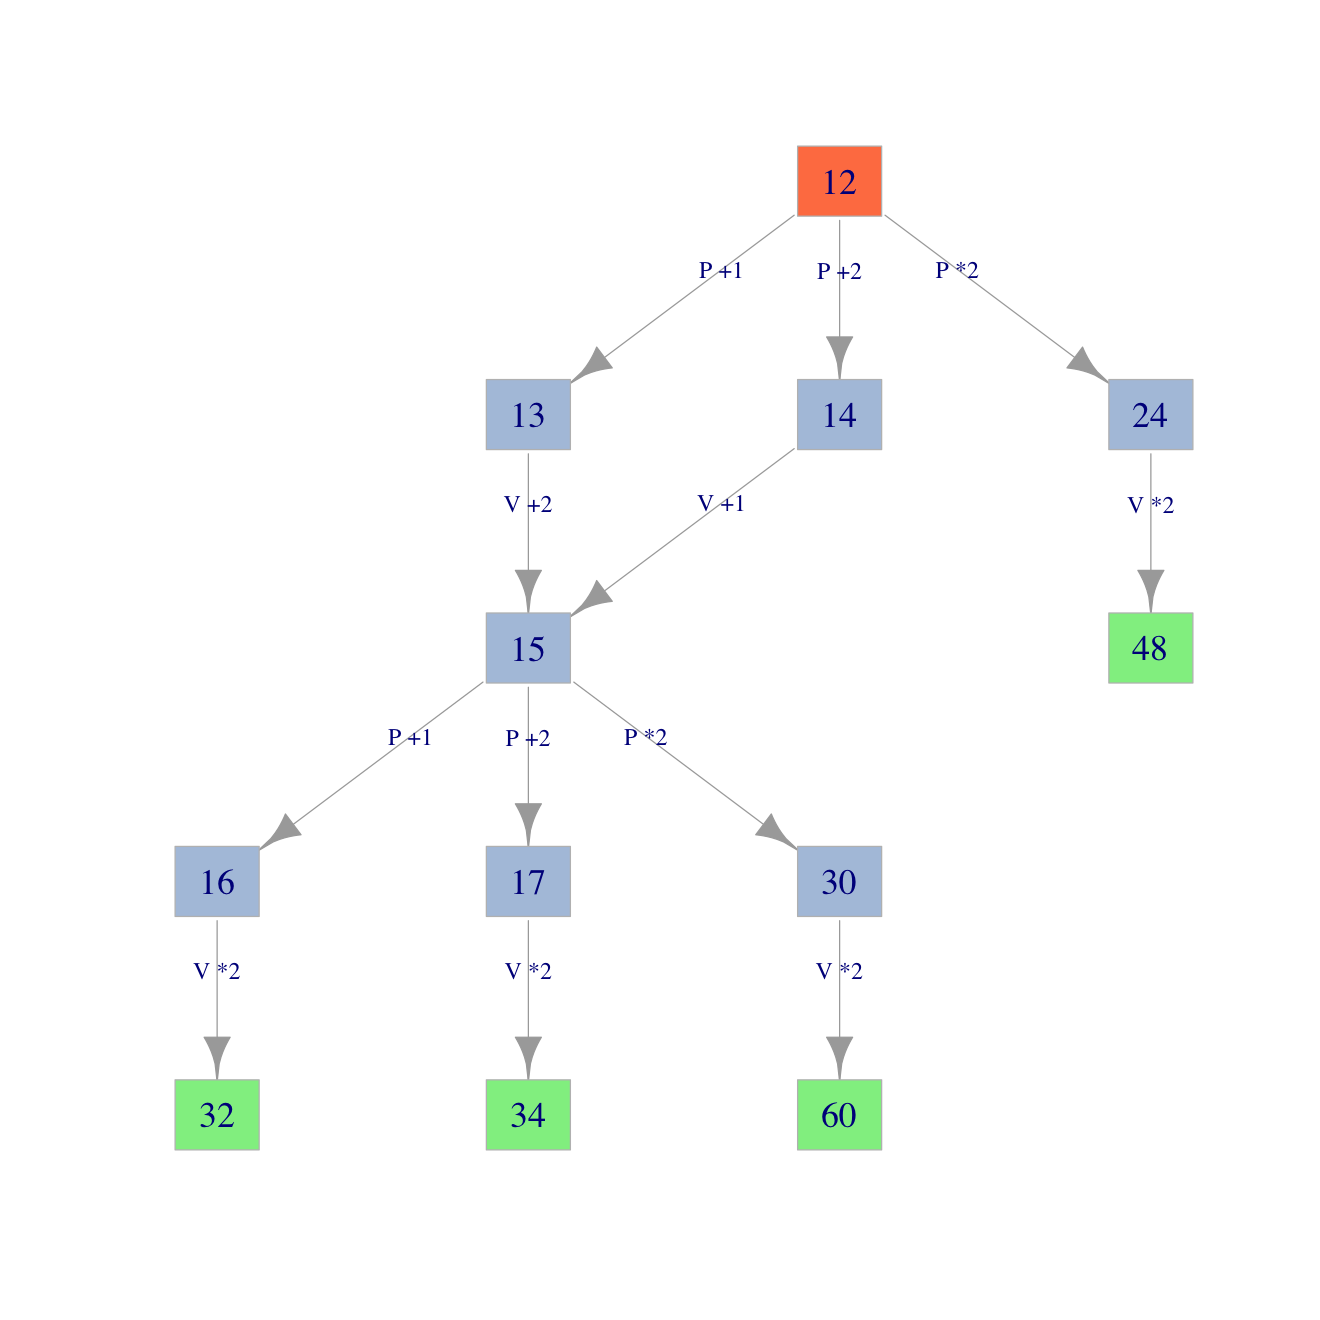

In [66]:
options(repr.plot.width=11,repr.plot.height=11)
edges3 <- c('12','13', '12','14', '12','24', '13','15', '14','15', '24','48',
            '15','16', '15','17', '15','30', '16','32', '17','34', '30','60')
colors3 <- c('coral','lightsteelblue','lightsteelblue','lightsteelblue',
             'lightsteelblue','lightgreen','lightsteelblue','lightsteelblue',
             'lightsteelblue','lightgreen','lightgreen','lightgreen')
labels3 <- c('P +1','P +2','P *2','V +2','V +1','V *2',
             'P +1','P +2','P *2','V *2','V *2','V *2')

g3 <- graph(edges3)

plot(g3,layout=layout_as_tree,edge.label=labels3,edge.label.cex=1.2,
     vertex.color=colors3,vertex.size=18,vertex.label.cex=1.8,
     vertex.frame.color="gray",vertex.shape='rectangle');

In [67]:
answer_dictionary[26] <-'
1.
a.
P*2:16≤S≤30→32≤2*S≤60
b.
S=15
P+1:15→16 ∨ P+2:15→17 ∨ P*2:15→30
V*2:16→32 ∨ V*2:17→34 ∨ V*2:30→60
2.
S=13 ∨ S=14
P+2:13→15 ∨ P+1:14→15
V+1:15→16 ∨ V+2:15→17 ∨ V*2:15→30
P*2:16→32 ∨ P*2:17→34 ∨ P*2:30→60
3.
S=12
P+1:12→13 ∨ P+2:12→14 ∨ P*2:12→24
V+2:13→15 ∨ V+1:14→15 ∨ V*2:24→48
P+1:15→16 ∨ P+2:15→17 ∨ P*2:15→30
V*2:16→32 ∨ V*2:17→34 ∨ V*2:30→60
'

## 27.
После единых выпускных экзаменов по информатике в район пришла информация о том, какой ученик какой школы сколько баллов набрал. В районе считается подозрительной ситуация, когда в школе более двух учащихся набирают одинаковый наибольший балл по школе. Районный методист решила выяснить такие номера школ.

Программа должна вывести на экран номера этих школ, в любом порядке. Если такая школа окажется одна, нужно вывести наибольший балл в этой школе, с указанием того, что это наибольший балл. Если таких школ не окажется, нужно вывести об этом сообщение.

Напишите эффективную, в том числе и по используемой памяти, программу (укажите используемую версию языка программирования, например, `Borland Pascal 7.0`), которая должна вывести на экран требуемую информацию. Известно, что информатику сдавало больше 5-ти учеников района. Также известно, что в районе школы с некоторыми номерами не существуют.

На вход программе сначала подаётся число учеников, сдававших экзамен. В каждой из следующих N строк находится информация об учениках в формате:

`<Фамилия> <Имя> <Номер школы> <Количество баллов>`,

где `<Фамилия>` — строка, состоящая не более, чем из 30 символов без пробелов, `<Имя>` — строка, состоящая не более, чем из 20 символов без пробелов, `<Номер школы>` — целое число в диапазоне от 1 до 99, `<Количество баллов>` — целое число диапазоне от 0 до 100. Эти данные записаны через пробел, причем ровно один между каждой парой (то есть, всего по три пробела в каждой строке).

Пример входной строки:

`Иванов Иван 50 87`

Пример выходных данных:

`5 50 74 87`

Другой вариант выходных данных:

`7`

`Наибольший балл = 74`

Третий вариант выходных данных:

`Нет таких школ`

---

After a final examination in informatics, information was received in the district administration about which pupil of which school scored how many points. In the district, it is considered suspicious when in the school more than two students gain the same highest score for the school. The District Methodist decided to find out such school numbers.

The program should display the numbers of these schools, in any order. If such a school is only one, it needs to deduce the highest score in this school, indicating that this is the highest score. If there are no such schools, the program should print a message about this.

Write an effective program, including the memory used (specify the version of the programming language used, for example, `Borland Pascal 7.0`), which should display the required information. It is known that more than 5 pupils of the district passed the exam in Computer Science. It is also known that in the school district some numbers do not exist.

The input for the program is, at first, the number of students (N) who passed the exam. Then each of the following N lines contains information about students in the format:

`<Surname> <Name> <School number> <Score>`,

where `<Surname>` is a string consisting of not more than 30 characters without spaces, `<Name>` - a string consisting of not more than 20 characters without spaces, `<School number>` - an integer in the range from 1 to 99, `<Score>` - an integer between 1 and 100. These data are written with white spaces, with exactly one between each pair (that is, only three spaces per line).

Example of an input line:

`Ivanov Ivan 50 87`

Example of an output line:

`5 50 74 87`

Another variant of the output data:

`7`

`Highest Score = 74`

The third variant of the output:

`No such schools`


Пример персональных данных.

1. Аверин Алексей 7 78
2. Бодрова Екатерина 38 81
3. Бондарев Максим 53 65
4. Вершинин Денис 7 87
5. Воронова Галина 7 76
6. Газиев Марат 38 83
7. Грачев Иван 38 67
8. Есин Руслан 53 88
9. Колесникова Мария 38 74
10. Лескова Анна 53 83
11. Мельников Роман 38 77
12. Морозова Жанна 53 88
13. Нестерова Роза 38 81
14. Нигматулин Ринат 7 72
15. Носиков Илья 53 88
16. Ольховский Дмитрий 7 79
17. Петренко Дарья 7 82
18. Робертсон Артур 38 73
19. Стариков Кирилл 53 70
20. Терехов Леонид 7 84

In [86]:
N <- as.integer(readline("Число учеников, сдававших экзамен: "))
school_numbers <- 1:99
max_school_scores <- integer(99)
students_with_max_scores <- integer(99)

cat("Персональные данные в формате: \n")
cat("<Фамилия><пробел><Имя><пробел><Номер школы><пробел><Количество баллов>\n")
cat(replicate(18,"=-="))
cat("\n")

for (i in 1:N){
    string <- unlist(strsplit(readline(paste(toString(i),"ученик ",sep=" ")),"[ ]"))
    school_number <- as.integer(string[3])
    score <- as.integer(string[4])
    
    if (max_school_scores[school_number] < score) {
        max_school_scores[school_number] <- score
        students_with_max_scores[school_number] <- 1        
    } else if (max_school_scores[school_number] == score) {
        students_with_max_scores[school_number] <- students_with_max_scores[school_number] + 1
    }
}

max_school_numbers <- ""
max_scores <- ""

for (i in 1:99) {
    if (students_with_max_scores[i] > 2) {
        max_school_numbers <- paste(max_school_numbers,toString(i),sep=" ")
        max_scores <- paste(max_scores,max_school_scores[i],sep=" ")
    }
}

cat(replicate(18,"=-="))
cat("\n")
l <- length(unlist(strsplit(max_school_numbers,"[ ]")))

if (l == 2) {
    cat(substring(max_school_numbers,2))
    cat(paste("\nНаибольший балл =",max_scores,sep=""))
} else if (l == 0) {
    cat("Нет таких школ")
} else {
    cat(substring(max_school_numbers,2))
}

Число учеников, сдававших экзамен: 20
Персональные данные в формате: 
<Фамилия><пробел><Имя><пробел><Номер школы><пробел><Количество баллов>
=-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-=
1 ученик Аверин Алексей 7 78
2 ученик Бодрова Екатерина 38 81
3 ученик Бондарев Максим 53 65
4 ученик Вершинин Денис 7 87
5 ученик Воронова Галина 7 76
6 ученик Газиев Марат 38 83
7 ученик Грачев Иван 38 67
8 ученик Есин Руслан 53 88
9 ученик Колесникова Мария 38 74
10 ученик Лескова Анна 53 83
11 ученик Мельников Роман 38 77
12 ученик Морозова Жанна 53 88
13 ученик Нестерова Роза 38 81
14 ученик Нигматулин Ринат 7 72
15 ученик Носиков Илья 53 88
16 ученик Ольховский Дмитрий 7 79
17 ученик Петренко Дарья 7 82
18 ученик Робертсон Артур 38 73
19 ученик Стариков Кирилл 53 70
20 ученик Терехов Леонид 7 84
=-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-= =-=
53
Наибольший балл = 88

In [68]:
program <-'
N <- as.integer(readline("Число учеников, сдававших экзамен: "))
school_numbers <- 1:99
max_school_scores <- integer(99)
students_with_max_scores <- integer(99)

cat("Персональные данные в формате: \n")
cat("<Фамилия><пробел><Имя><пробел><Номер школы><пробел><Количество баллов>\n")
cat(replicate(18,"=-="))
cat("\n")

for (i in 1:N){
    string <- unlist(strsplit(readline(paste(toString(i),"ученик ",sep=" ")),"[ ]"))
    school_number <- as.integer(string[3])
    score <- as.integer(string[4])
    
    if (max_school_scores[school_number] < score) {
        max_school_scores[school_number] <- score
        students_with_max_scores[school_number] <- 1        
    } else if (max_school_scores[school_number] == score) {
        students_with_max_scores[school_number] <- students_with_max_scores[school_number] + 1
    }
}

max_school_numbers <- ""
max_scores <- ""

for (i in 1:99) {
    if (students_with_max_scores[i] > 2) {
        max_school_numbers <- paste(max_school_numbers,toString(i),sep=" ")
        max_scores <- paste(max_scores,max_school_scores[i],sep=" ")
    }
}

cat(replicate(18,"=-="))
cat("\n")
l <- length(unlist(strsplit(max_school_numbers,"[ ]")))

if (l == 2) {
    cat(substring(max_school_numbers,2))
    cat(paste("\nНаибольший балл =",max_scores,sep=""))
} else if (l == 0) {
    cat("Нет таких школ")
} else {
    cat(substring(max_school_numbers,2))
}'

In [69]:
answer_dictionary[27] <- paste(version, program, sep="\n")

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [70]:
answer_dictionary

<hash> containing 27 key-value pair(s).
  1 : 6
  10 : ДДБД
  11 : 17
  12 : CADB
  13 : 100
  14 : 8877
  15 : 36
  16 : 5
  17 : 11600
  18 : 5
  19 : 4
  2 : 45
  20 : 58
  21 : 94
  22 : 9
  23 : 72
  24 : 
1.
| Область | Условие 1 | Условие 2 | Условие 3 | Программа выведет | Область обрабатывается верно |
|-:|-:|-:|-:|-:|-:|
| Area | Condition 1 | Condition 2 | Condition 3 | Program Results | The Area Is Processed Correctly |
|   | `y ≤ x` | `y ≤ -x` | `y ≥ x * x - 2` |  |  |
| A | нет / no | - | - | - | нет / no |
| B | нет / no | - | - | -| нет / no |
| C | нет / no | - | - | - | нет / no |
| D | нет / no | - | - | -| нет / no |
| E | да / yes | нет / no | - | - | нет / no |
| F | да / yes | да / yes | нет / no | принадлежит / belongs | да / yes |
| G | да / yes | да / yes | да / yes | не принадлежит / does not belong | да / yes |
| H | нет / no | - | - | - | нет / no |
| I | да / yes | нет / no | - | - | нет / no |
2.
if (y <= -x) {
    if (y <= x) {
        if (y >= x * x - 2